## Error , Trend & Seasonality 

* ERROR

* TREND (linear, exp, log ...) 

* SEASONABILITY (repetitions with a fixed time interval - NOT equals to CYCLICAL)

Multiplicative -> Error * Trend * Seasonability

Additive -> Error + Trend + Seasonability

#### Several ways for TS Decomposition
* Hodrick-Prescot Filter
* ETS decomposition


<AxesSubplot: xlabel='Time'>

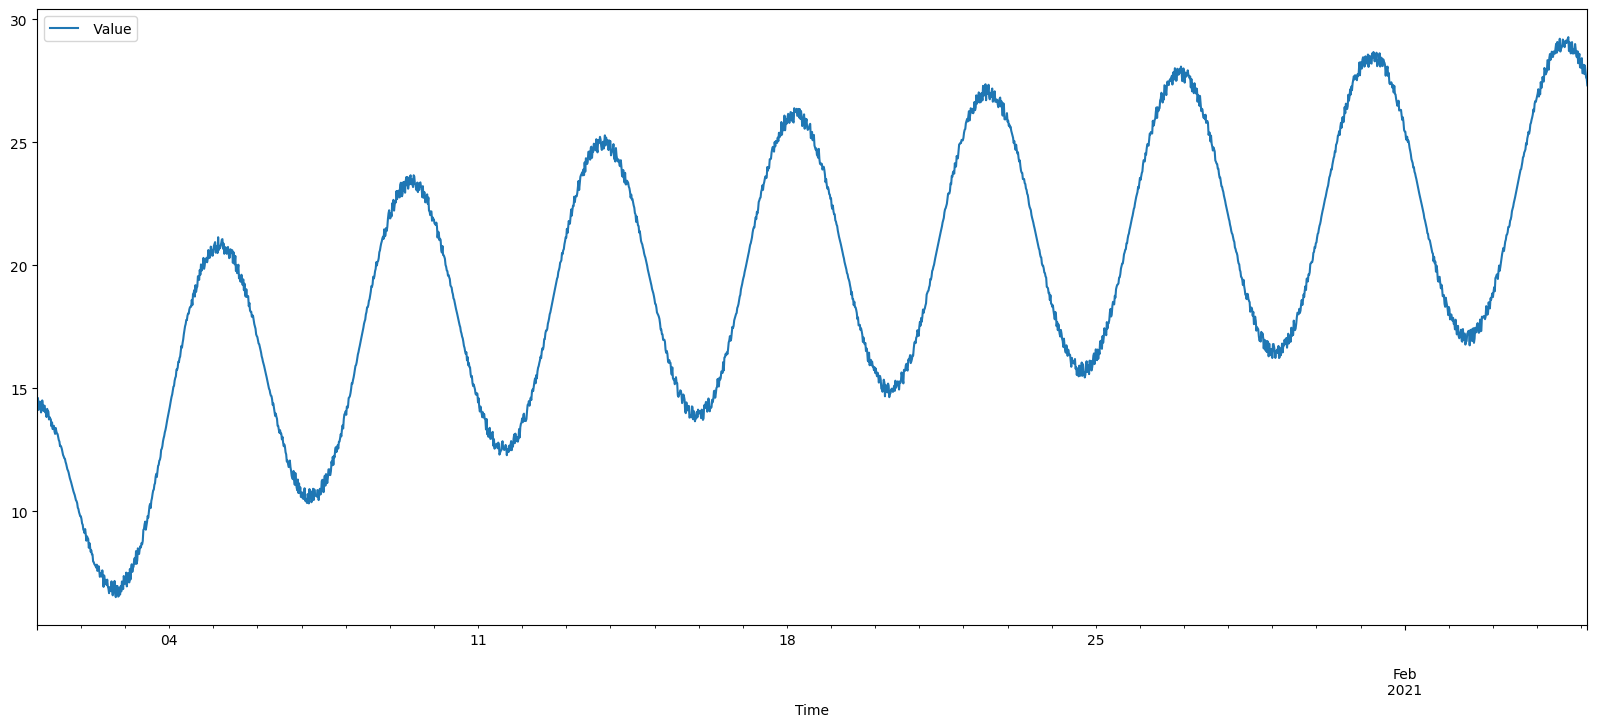

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
ts = pd.read_csv('./data2.csv', header=0, parse_dates=[0], dayfirst=True, index_col=0)
tsr = ts.resample(rule='20T').mean()


tsr.plot(figsize=(20,8))


<AxesSubplot: xlabel='Time'>

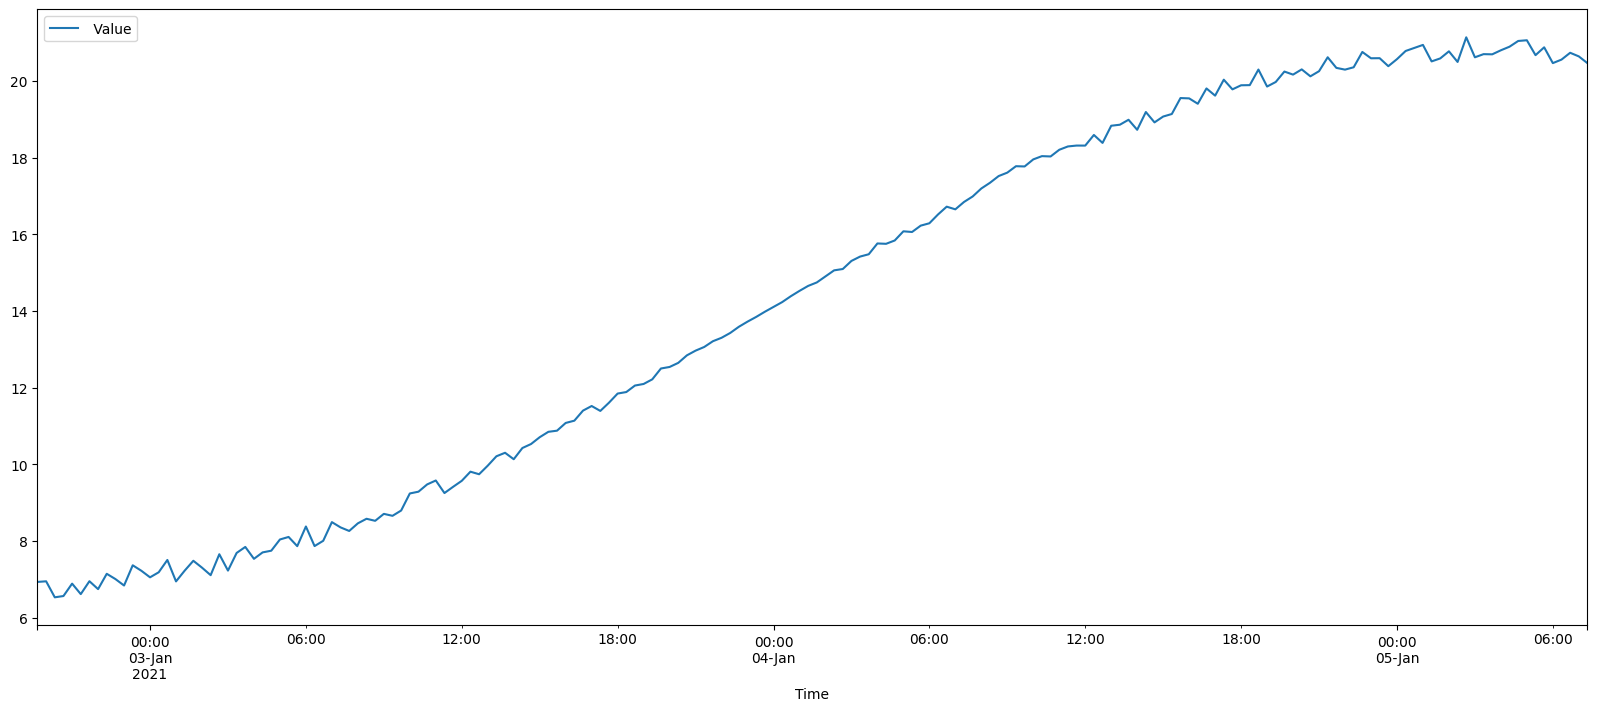

In [12]:
tsr.iloc[130:310].plot(figsize=(20,8))

### Hodrick-Prescot Filter

Split a TS into a TREND component and a CYCLYCAL component.
It tries to remove the CYCLYCAL component of a time series to obtain a smoothed-curve representation of the TREND.
Focused on long-term TREND rather than to short-term fluctuations.
The adjustment of the sensitivity of the trend to short-term fluctuations is achieved by modifying a multiplier represented by LAMBDA.

In [3]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
ts_cycle, ts_trend = hpfilter(ts, lamb=1600)  #1600 suggested value that works fine with 

<AxesSubplot: xlabel='Time'>

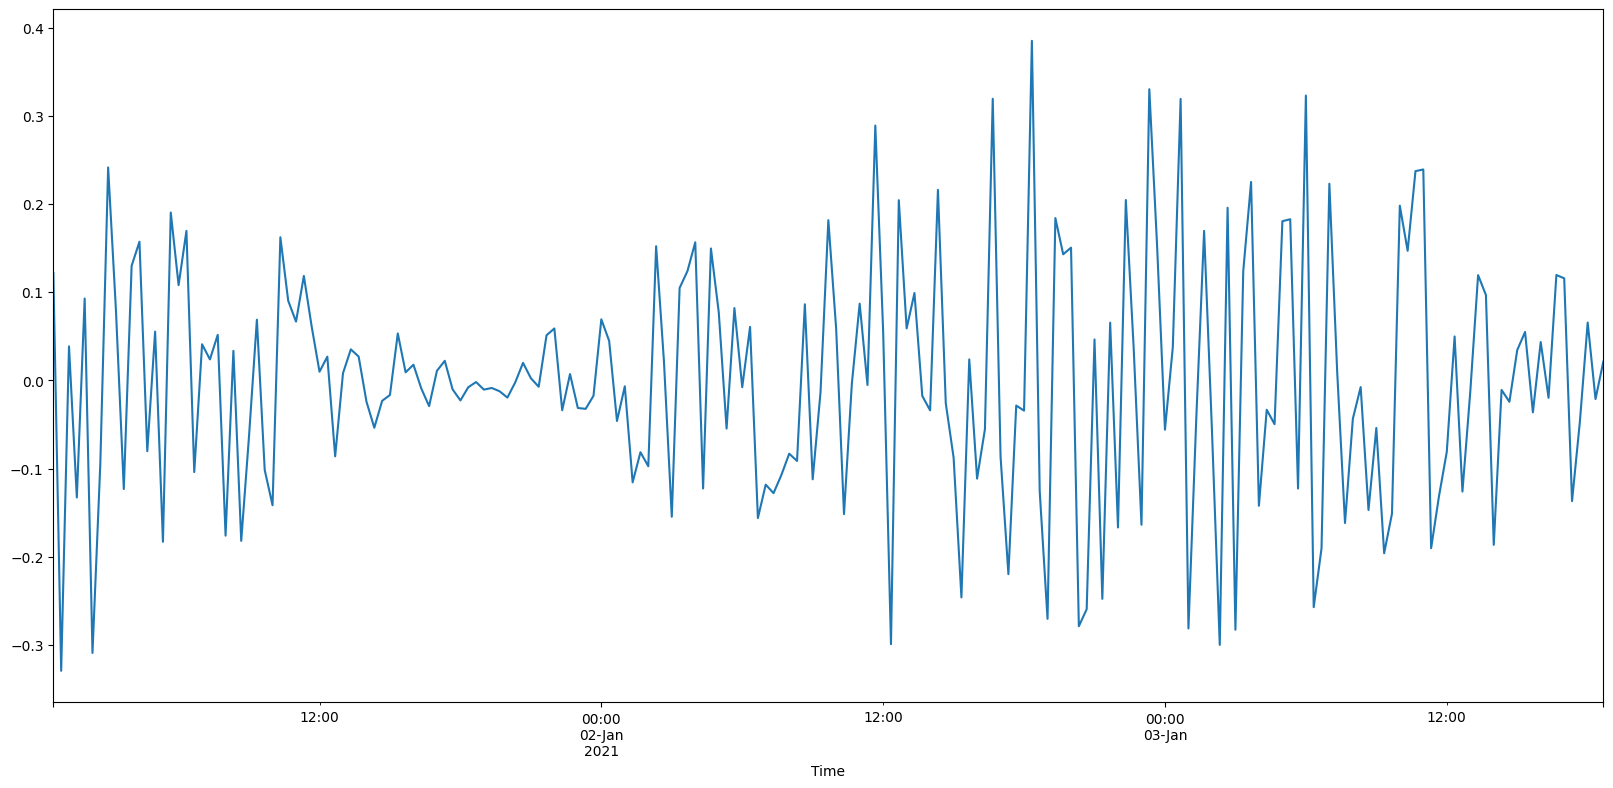

In [13]:
ts_cycle.iloc[1:200].plot(figsize=(20,9))

<AxesSubplot: xlabel='Time'>

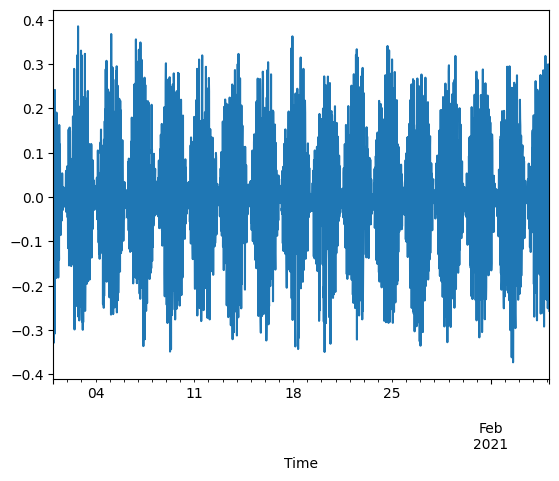

In [6]:
ts_cycle.plot()

<AxesSubplot: xlabel='Time'>

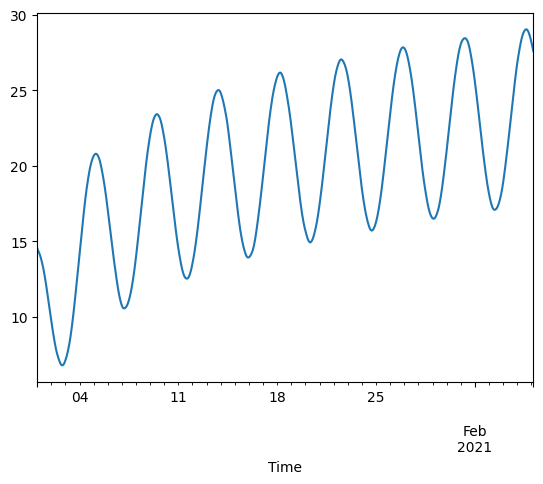

In [7]:
ts_trend.plot()

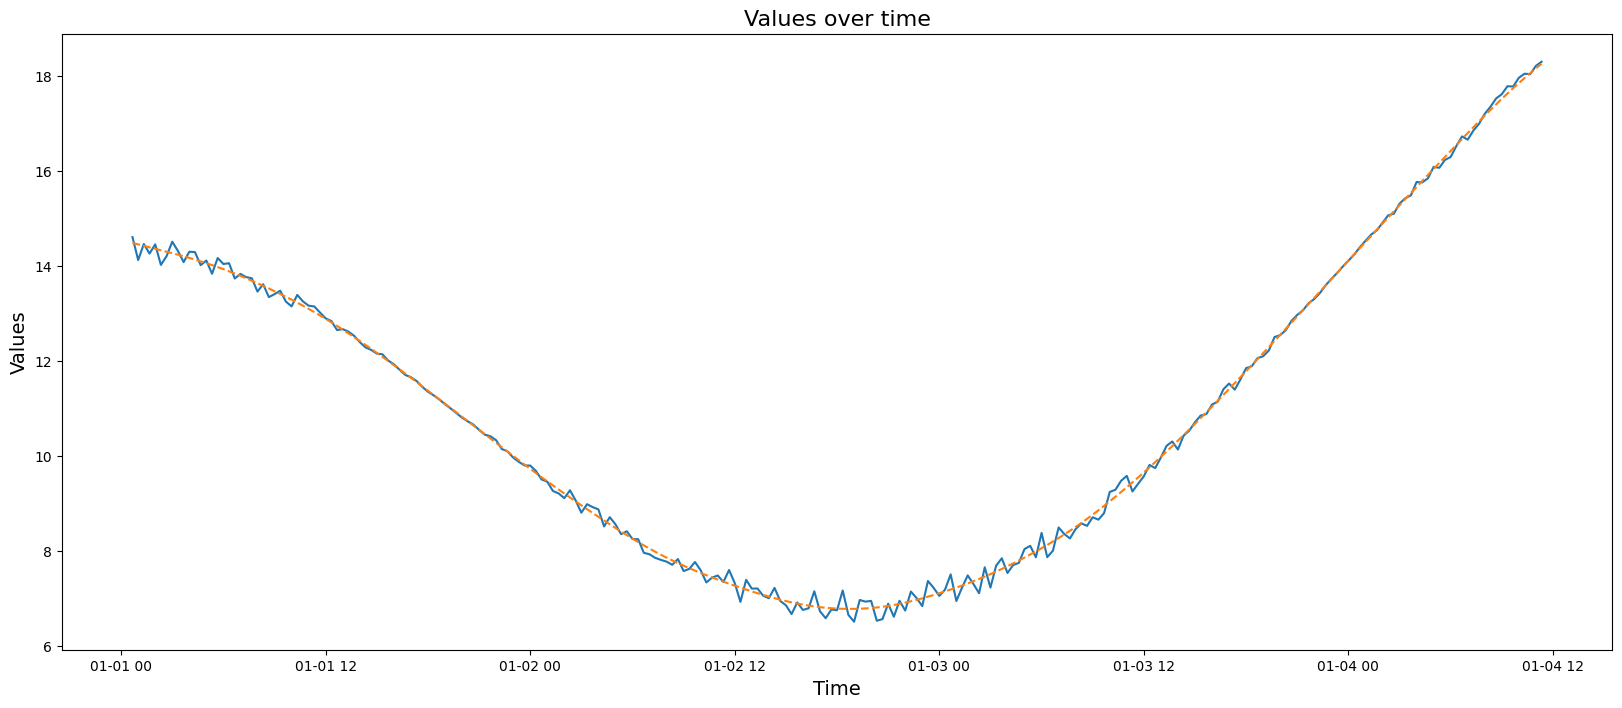

In [8]:
#define size
plt.figure(figsize=(20,8))
#add axes labels and a title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)
plt.plot(ts.iloc[1:250], "-", label = 'ts')
plt.plot(ts_trend.iloc[1:250],"--", label = 'ts_t')

### ETS Decomposition

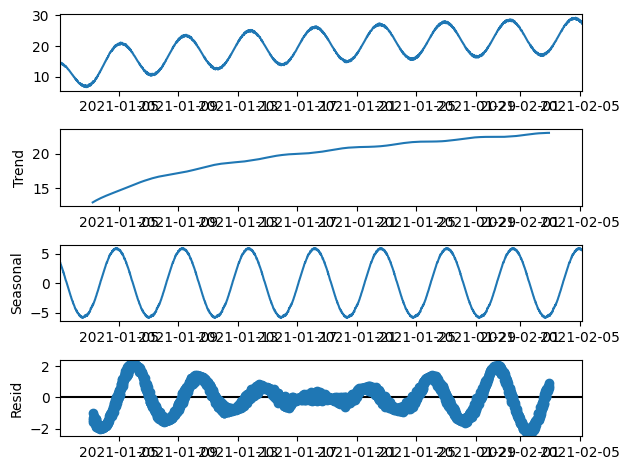

In [22]:
#Decompose - testing model & period(320)
from statsmodels.tsa.seasonal import seasonal_decompose
tsr2 = ts.resample(rule='20T').mean()
result = seasonal_decompose(tsr2, model='add', period=320)  # model='add' also works 
result.plot();

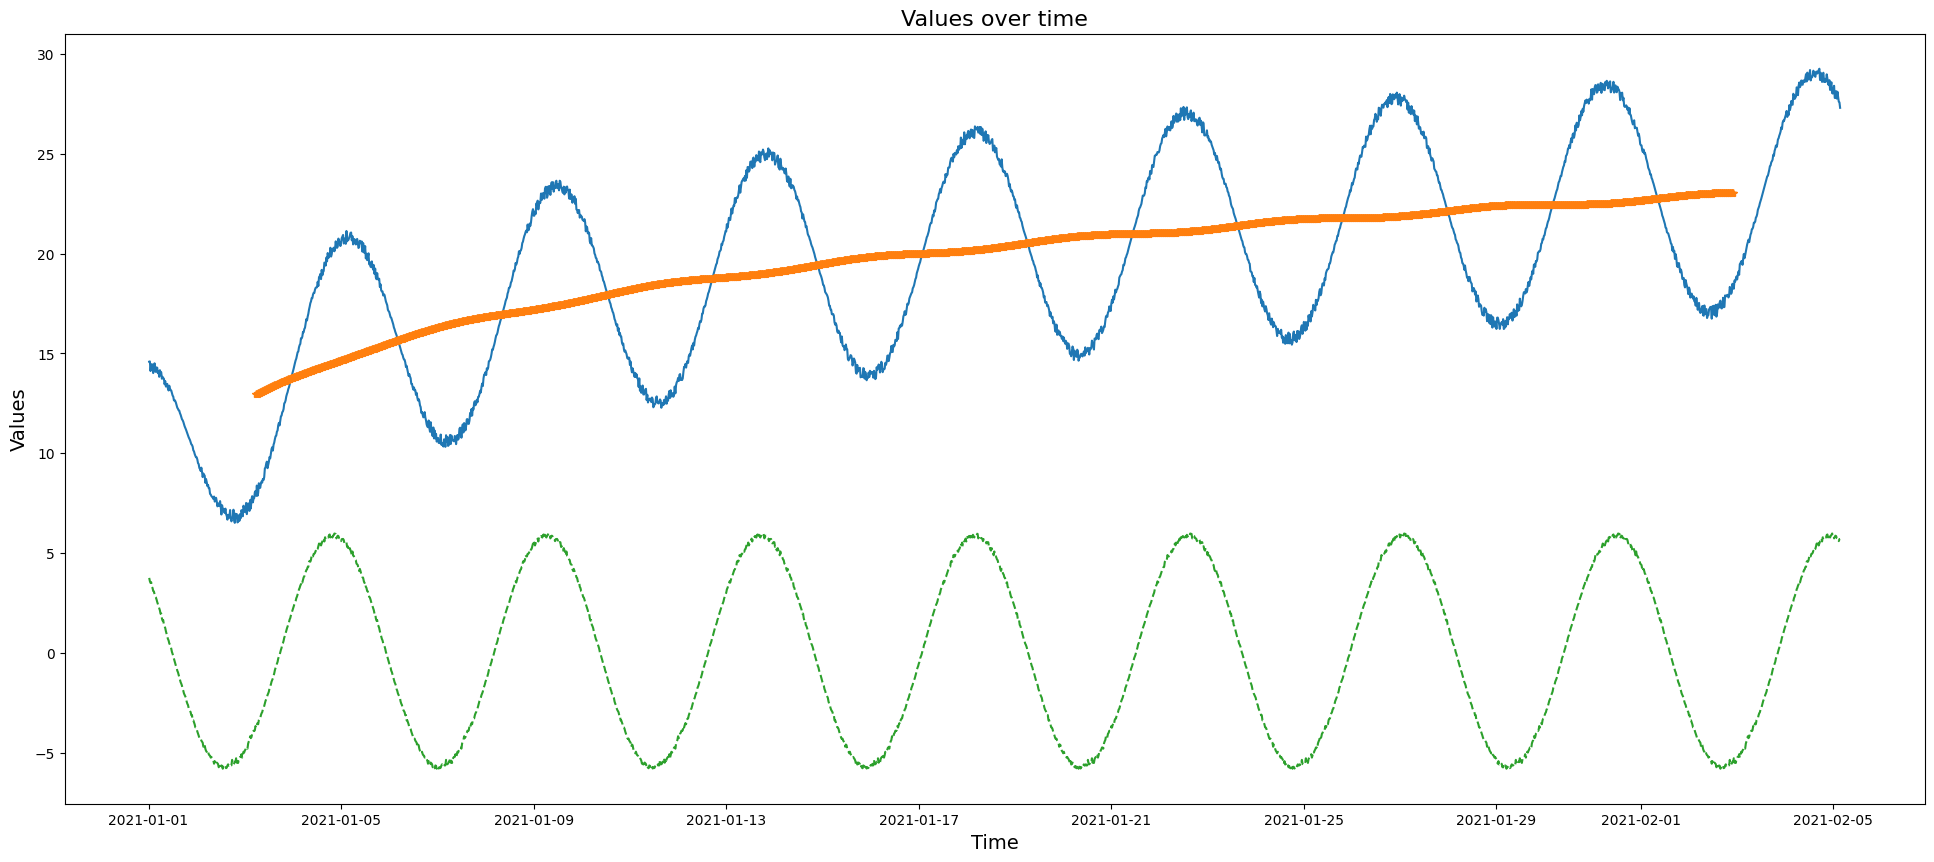

In [10]:
#define size
plt.figure(figsize=(24,10))
#add axes labels and a title
plt.ylabel('Values', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time', fontsize=16)
plt.plot(ts, "-", label = 'ts')
plt.plot(result.trend,"*", label = 'ts_t')
plt.plot(result.seasonal,"--", label = 'ts_s')